# Proyecto Simulación
## Integrantes (C312)
Amanda Cordero Lezcano

Christopher Guerra Herrero

Alfredo Nuño Oquendo

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [3]:

data = pd.read_csv('data.csv')
# Mostrar las primeras filas del DataFrame para tener una idea de la estructura de los datos
data.head()


,ave_clients_dist,ave_student_dist,max_size_queue,ave_size_queue,ave_wait_time,ave_attention_time,total_clients_attended,libraries_count,sjf
0,1.444783,2.075243,1,0.045455,0.001839,1.171312,22,4,False
1,0.632117,2.871618,14,6.914894,4.118321,3.164698,47,5,False
2,1.068087,3.892959,1,0.035714,0.034112,3.896531,28,5,True
3,0.896784,3.095499,18,8.764706,4.052808,1.758596,17,1,True
4,0.989505,3.359625,24,13.214286,4.984357,2.064320,14,1,True


In [4]:
# Analizar el DataFrame
# Obtener información estadística sobre el DataFrame
data.describe()

,ave_clients_dist,ave_student_dist,max_size_queue,ave_size_queue,ave_wait_time,ave_attention_time,total_clients_attended,libraries_count
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,1.020848,3.048880,10.624365,4.900377,3.412393,3.127597,21.294416,2.989848
std,0.304477,0.795088,11.753029,6.511025,4.078933,1.195412,10.290407,2.025324
min,0.504022,1.058505,0.000000,0.000000,0.001732,1.171312,3.000000,1.000000
25%,0.739098,2.447968,2.000000,0.194444,0.220579,2.423614,13.000000,1.000000
50%,1.015891,2.991328,6.000000,2.090909,1.961354,2.885002,20.000000,3.000000
75%,1.290167,3.671649,16.000000,7.300000,4.996213,3.497342,28.000000,4.000000
max,1.498806,4.941182,58.000000,35.714286,17.868500,11.429989,60.000000,8.000000


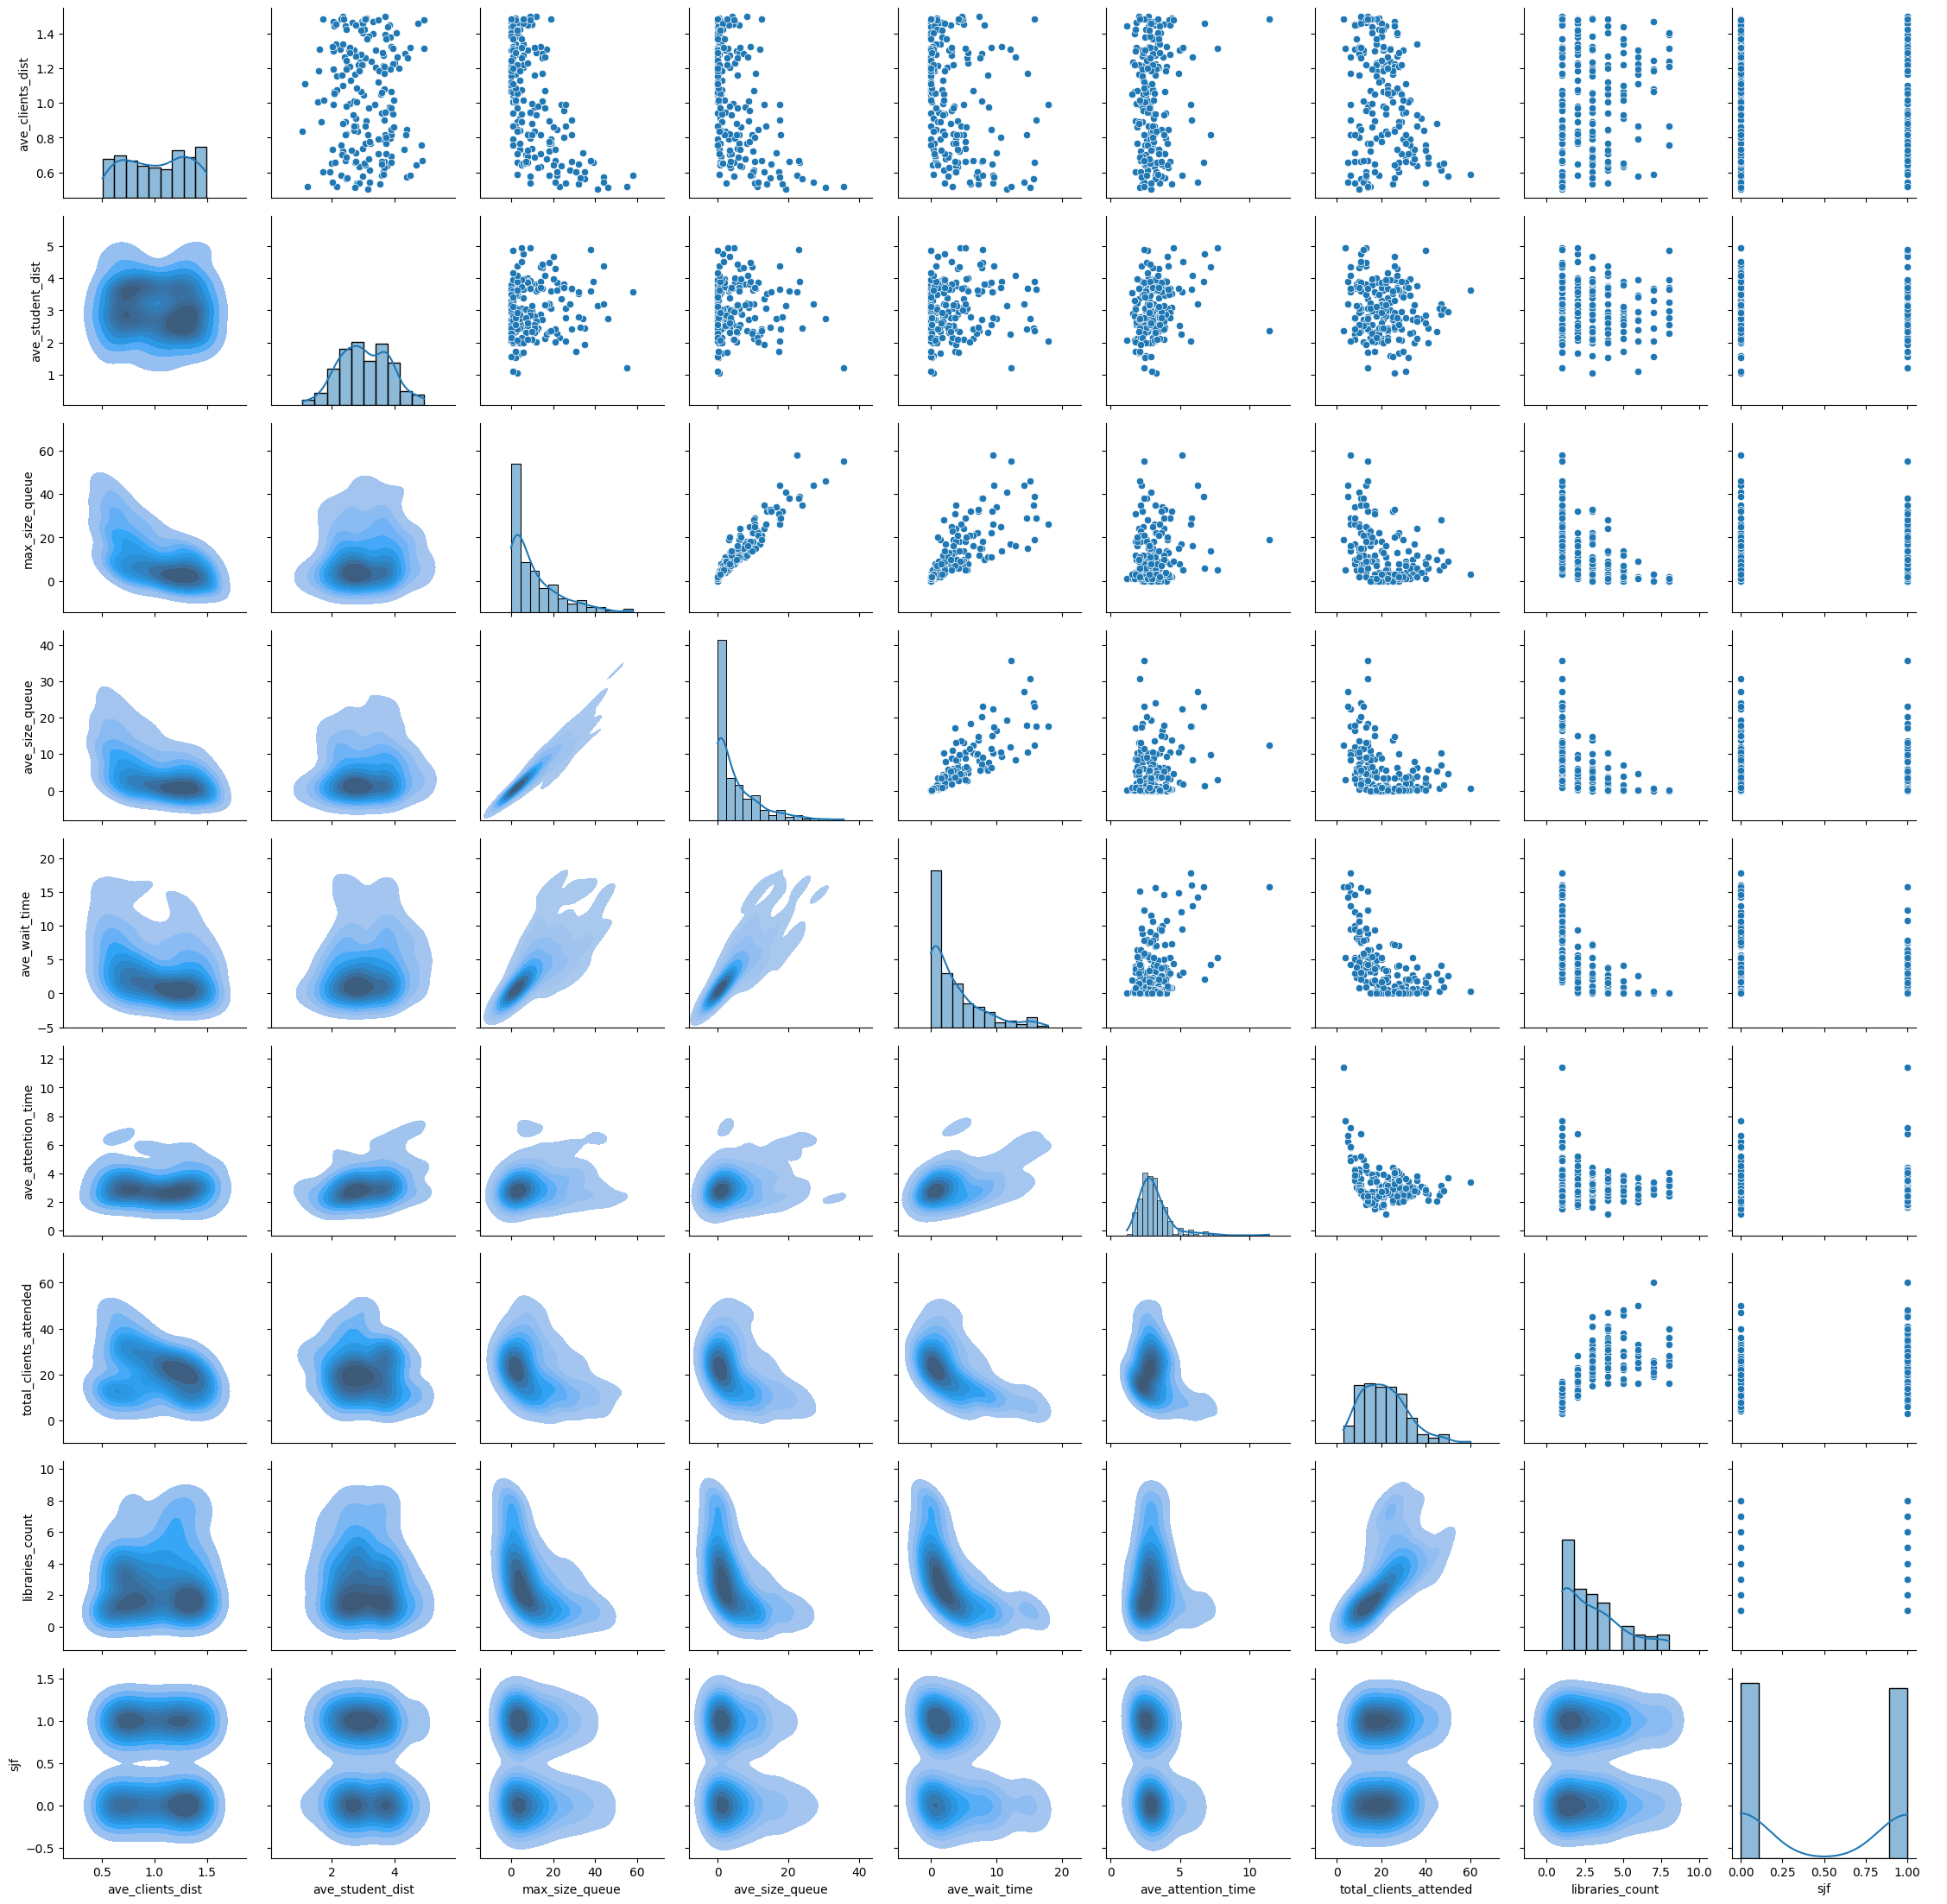

In [5]:
# PairGrid para visualizar múltiples comparaciones
g = sns.PairGrid(data)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)
g.add_legend()
plt.show()

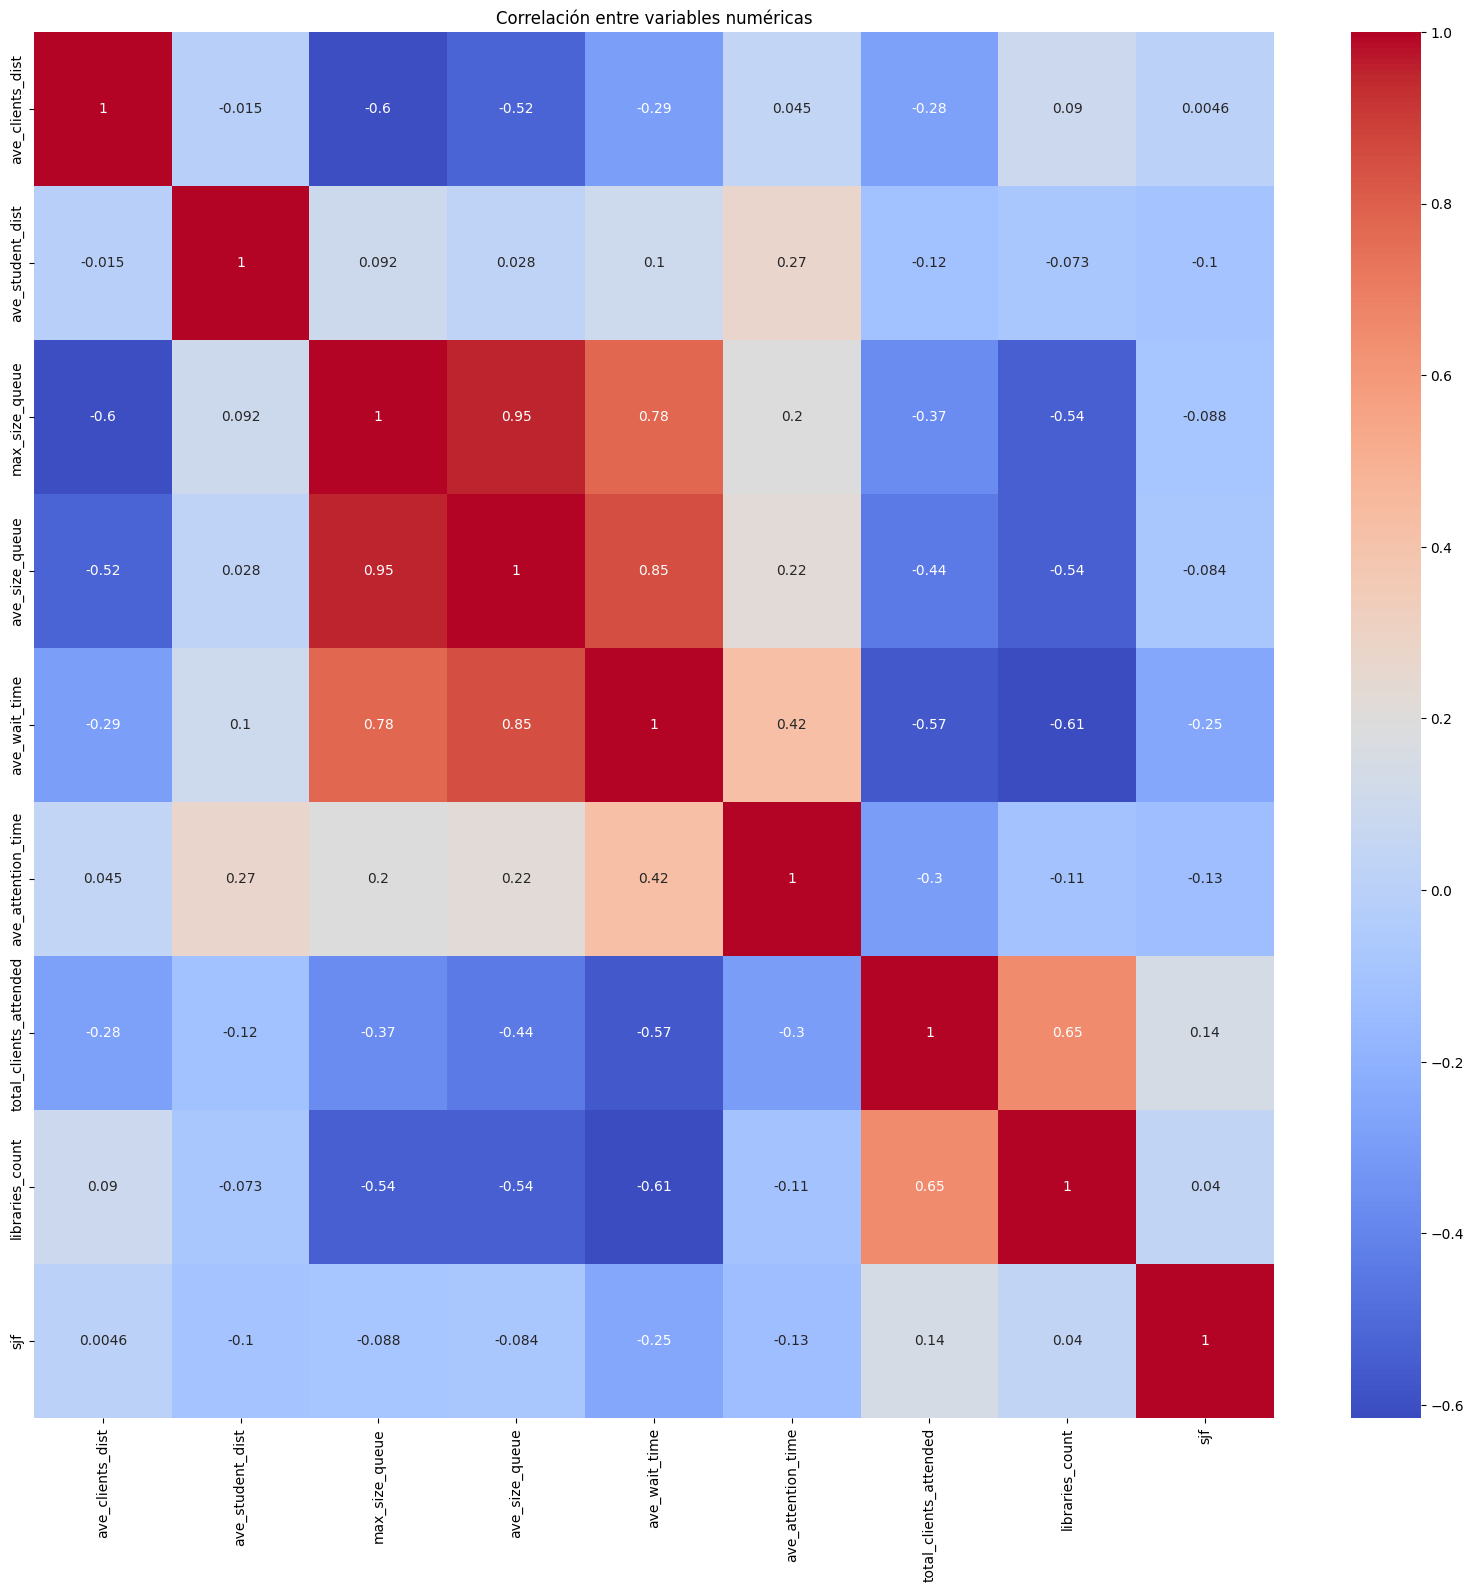

In [6]:

# Heatmap para visualizar la correlación entre todas las variables numéricas
correlation_matrix = data.corr()
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre variables numéricas')
plt.show()

In [8]:
import scipy.stats as stats

# Ejemplo: 'sjf' es booleana y 'ave_wait_time' es continua
group1 = data[data['sjf'] == True]['ave_wait_time']
group2 = data[data['sjf'] == False]['ave_wait_time']
t_stat, p_value = stats.ttest_ind(group1, group2)

print(f'T-statistic: {t_stat}, p-value: {p_value}')

T-statistic: -3.642373232551547, p-value: 0.0003461812210001324


In [9]:
import pandas as pd

# Calcular las medias
mean_wait_time_sjf = data[data['sjf'] == True]['ave_wait_time'].mean()
mean_wait_time_no_sjf = data[data['sjf'] == False]['ave_wait_time'].mean()

print(f'Media de ave_wait_time cuando sjf=True: {mean_wait_time_sjf}')
print(f'Media de ave_wait_time cuando sjf=False: {mean_wait_time_no_sjf}')

# Interpretar las medias
if mean_wait_time_sjf > mean_wait_time_no_sjf:
    print("La política SJF incrementa el tiempo promedio de espera.")
else:
    print("La política SJF disminuye el tiempo promedio de espera.")


Media de ave_wait_time cuando sjf=True: 2.3697633942986784
Media de ave_wait_time cuando sjf=False: 4.423743511650659
La política SJF disminuye el tiempo promedio de espera.


                         sum_sq     df          F        PR(>F)
C(libraries_count)  1783.177125    7.0  32.579106  2.034454e-29
Residual            1477.811651  189.0        NaN           NaN


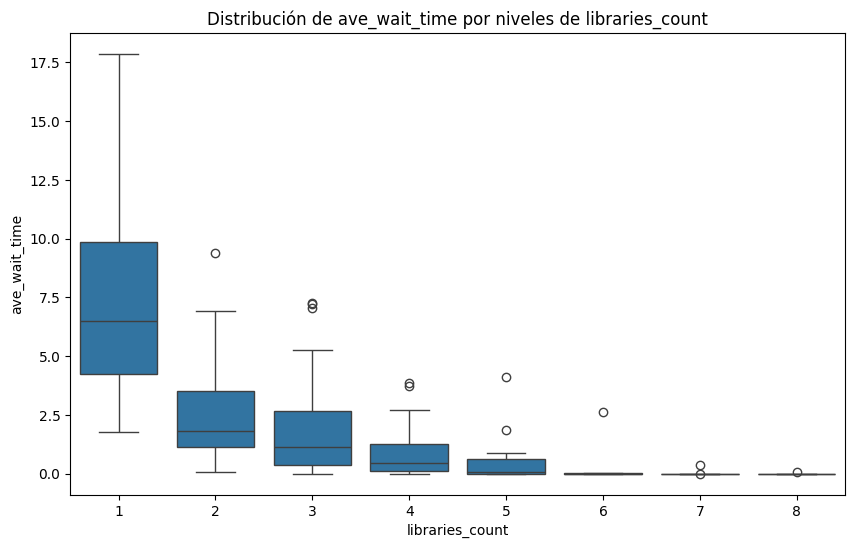

In [11]:
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns


# Realizar el ANOVA
model = ols('ave_wait_time ~ C(libraries_count)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

# Visualización de los datos
plt.figure(figsize=(10, 6))
sns.boxplot(x='libraries_count', y='ave_wait_time', data=data)
plt.title('Distribución de ave_wait_time por niveles de libraries_count')
plt.xlabel('libraries_count')
plt.ylabel('ave_wait_time')
plt.show()


In [12]:
import scipy.stats as stats

# Suponiendo que 'variable1' y 'variable2' son continuas o ordinales
spearman_corr, p_value = stats.spearmanr(data['total_clients_attended'], data['libraries_count'])

print(f'Spearman correlation: {spearman_corr}, p-value: {p_value}')


Spearman correlation: 0.7986489838187484, p-value: 7.007139031555246e-45
